In [1]:
import json

In [2]:
with open('air_india.json','r') as air_india:
    air_india_json=json.load(air_india)

In [3]:
def counting_function(field,jsn):
    count=0
    for i in range(len(jsn)):
        if not jsn[i][field]==None:
            count+=1
    return count
        

In [4]:
def clean_json_data(airline_name):
    with open(airline_name,'r') as airline:
        airline_json=json.load(airline)
        fields=['cabin','content','date','destination','rating','route','title']
        print ("Original")
        for field in fields:
            print( field+": ",counting_function(field,airline_json))
        print ("After clean up")
        new_airline_json=[]
        for i in range(len(airline_json)):
            if not (airline_json[i]['content']==None and airline_json[i]['title']==None and  airline_json[i]['rating']==None):
                new_airline_json.append(airline_json[i])
        for field in fields:
            print(field+": ",counting_function(field,new_airline_json))

In [5]:
clean_json_data('indigo.json')

Original
cabin:  5737
content:  3491
date:  3491
destination:  5737
rating:  3491
route:  5737
title:  3491
After clean up
cabin:  3491
content:  3491
date:  3491
destination:  3491
rating:  3491
route:  3491
title:  3491


In [6]:
clean_json_data('spicejet.json')

Original
cabin:  2385
content:  1505
date:  1505
destination:  2385
rating:  1505
route:  2385
title:  1505
After clean up
cabin:  1505
content:  1505
date:  1505
destination:  1505
rating:  1505
route:  1505
title:  1505


In [7]:
clean_json_data('goair.json')

Original
cabin:  677
content:  424
date:  424
destination:  677
rating:  424
route:  677
title:  424
After clean up
cabin:  424
content:  424
date:  424
destination:  424
rating:  424
route:  424
title:  424


# Preprocess data
## Removing stopwords
### Removing puctuation marks

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
useless_words=['air','flight','airlin','goair','indigo','ground','jet','airways','they','i','jetairways','travel','also','took','spice jet','even','fli','also']

def preprocess(jsn):
    for i in range(len(jsn)):
        preprocessed_content=[]
        content=jsn[i]['content']
        if not content==None:
            content=content.split()
            for token in content:
                if token not in stop_words:
                    
                    preprocessed_content.append(token.lower())
            

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PIYALI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.Collecting nltk
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     -------------------------------------  41.0/42.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 675.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 5.8 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 13.6 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/269.5 kB ? eta -:--:--
   --------------------------------------- 269.5/269.5 kB 16.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ---------------------------------------- 97.9/97.9 kB 5.8 MB/s eta 0:00:00




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
def read_json(airline_name):
    with open(airline_name,'r') as airline:
        airline_json=json.load(airline)
        return airline_json
goair_json=read_json('goair.json')
preprocess(goair_json)
spicejet_json=read_json('spicejet.json')
preprocess(spicejet_json)
preprocess(read_json('air_india.json'))
preprocess(read_json('indigo.json'))
preprocess(read_json('jet_airways.json'))

In [15]:
from nltk.stem.porter import PorterStemmer
import string
porter_stemmer = PorterStemmer()   
import string
import json
def read_json(airline_name):
    with open(airline_name,'r') as airline:
        airline_json=json.load(airline)
        return airline_json
    
def preprocess(jsn):
    c=[]
    table = {ord(char): None for char in string.punctuation}
    for i in range(len(jsn)):
        preprocessed_content=[]
        content=jsn[i]['content']
        
        if not content==None:
            content=content.split()
            for token in content:
                if token not in stop_words and not token.lower().translate(table)=="aed":
                    
                    #print token.lower().translate(table)
                    preprocessed_content.append(porter_stemmer.stem(token.lower().translate(table)))
            c.append(preprocessed_content)
    return c

In [16]:
def write_tokens(f,alt):
    with open(f,'w') as al:
        d={}
        for i in range(len(alt)):
            d[i]=alt[i]
        json.dump(d,al)
write_tokens('air_india-token.json',preprocess(read_json('air_india.json')))        
write_tokens('spicejet_tokens.json',preprocess(read_json('spicejet.json')))
write_tokens('goair_tokens.json',preprocess(read_json('goair.json')))

In [17]:
import json
def calculate_polarity(file):
    d={}
    with open(file[:len(file)-5]+"_polarity.json",'w') as fp:
        with open(file,'r') as f :
            jsn=json.load(f)
            for i in range(len(jsn)):
                p=TextBlob(" ".join(jsn[str(i)])).sentiment.polarity
                d[" ".join(jsn[str(i)])]=p
            json.dump(d,fp)

In [42]:

import hashlib
def preprocess(jsn):
    c = set()  # Using a set to store hashes of token lists
    table = str.maketrans({char: None for char in string.punctuation})

    for entry in jsn:
        content = entry.get('content')
        if content:
            tokens = [porter_stemmer.stem(token.lower().translate(table)) for token in content.split()
                      if token not in stop_words and token.lower().translate(table) != "aed"]
            
            # Create a hash of the token list for uniqueness check
            hash_value = hashlib.md5(' '.join(tokens).encode()).hexdigest()
            if hash_value not in c:
                c.add(hash_value)
                yield tokens

def write_tokens(f, alt):
    with open(f, 'w') as al:
        json.dump({i: token_list for i, token_list in enumerate(alt)}, al)

write_tokens('indigo_tokens.json', preprocess(read_json('indigo.json')))
write_tokens('jet_airways-token.json', preprocess(read_json('jet_airways.json')))


In [20]:
from textblob import TextBlob
TextBlob
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
testimonial.sentiment.polarity
testimonial.classify

<bound method BaseBlob.classify of TextBlob("Textblob is amazingly simple to use. What great fun!")>

In [19]:
pip install TextBlob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   -- ------------------------------------- 41.0/626.3 kB 1.9 MB/s eta 0:00:01
   -- ------------------------------------- 41.0/626.3 kB 1.9 MB/s eta 0:00:01
   ------- ------------------------------ 122.9/626.3 kB 901.1 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/626.3 kB 901.1 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/626.3 kB 888.4 kB/s eta 0:00:01
   ---------------- --------------------- 276.5/626.3 kB 947.5 kB/s eta 0:00:01
   ------------------------- -------------- 399.4/626.3 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 399.4/626.3 kB 1.2 MB/s eta 0:00:01
   ------------------------------ --------- 481.3/626.3 kB 1.2 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/626.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 1


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
def count_polarity(file):
    with open(file) as f:
        jsn=json.load(f)
        n=0
        p=0
        z=0
        for i in jsn.keys():
            if jsn[i]>0:
                p+=1
            elif jsn[i]<0:
                n+=1
            elif round(jsn[i],4)==0.0000:
                z+=1
        print("Positive : "+str(p),"Negative : "+str(n),"Nuetral : "+str(z),"Total : "+str(len(jsn.keys())))
calculate_polarity('goair_tokens.json')        
count_polarity('goair_tokens_polarity.json')
calculate_polarity('air_india-token.json')
count_polarity('air_india-token_polarity.json')
calculate_polarity('jet_airways-token.json')
count_polarity('jet_airways-token_polarity.json')
calculate_polarity('spicejet_tokens.json')
count_polarity('spicejet_tokens_polarity.json')
calculate_polarity('indigo_tokens.json')
count_polarity('indigo_tokens_polarity.json')

Positive : 289 Negative : 74 Nuetral : 61 Total : 424
Positive : 2063 Negative : 574 Nuetral : 234 Total : 2871
Positive : 4695 Negative : 984 Nuetral : 645 Total : 6324
Positive : 988 Negative : 310 Nuetral : 207 Total : 1505
Positive : 2597 Negative : 483 Nuetral : 408 Total : 3488


In [40]:
calculate_polarity('goair_tokens.json')

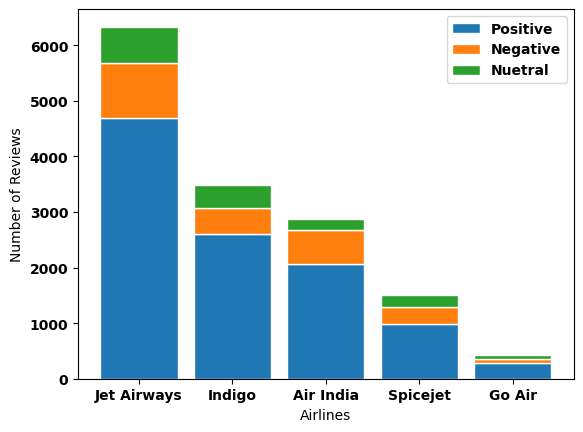

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [4695, 2597, 2070, 988, 289]
bars2 = [984, 483, 614, 310, 74]
bars3 = [655, 414, 189, 214, 61]
 
# Heights of bars1 + bars2 (TO DO better)
bars = [5679, 3080, 2684, 1298, 363]
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['Jet Airways','Indigo','Air India','Spicejet','Go Air']
barWidth = .825
# Create brown bars
p1=plt.bar(r, bars1, edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
p2=plt.bar(r, bars2, bottom=bars1, edgecolor='white', width=barWidth)
# Create green bars (top)
p3=plt.bar(r, bars3, bottom=bars, edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Airlines")
plt.ylabel("Number of Reviews")
plt.legend((p1[0], p2[0],p3[0]), ("Positive","Negative" ,'Nuetral'))
# Show graphic
plt.show()

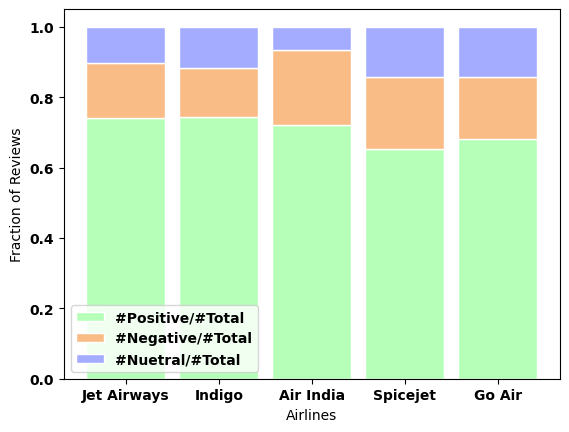

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2,3,4]
raw_data = {'greenBars': [4695, 2597, 2070, 988, 289], 'orangeBars': [984, 483, 614, 310, 74],'blueBars':  [655, 414, 189, 214, 61]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j  for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j  for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j  for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 0.85

names = ('Jet Airways','Indigo','Air India','Spicejet','Go Air')
# Create green Bars
p1=plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
p2=plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
p3=plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Airlines")
plt.ylabel("Fraction of Reviews")
plt.legend((p1[0], p2[0],p3[0]), ("#Positive/#Total","#Negative/#Total" ,'#Nuetral/#Total'))
# Show graphic
plt.show()

In [25]:
positive = []
for i in range(1,5):

  positive.append( greenBars[i] *totals[i] )


In [26]:
negative=[]
for i in range(1,5):

  negative.append( orangeBars[i] *totals[i] )


In [27]:
neutral = []
for i in range(1,5):

  neutral.append( blueBars[i] *totals[i] )


In [28]:
def reviews(file):
    with open(file) as f:
        jsn=json.load(f)
        rev=[]
        for i in jsn.keys():
            if jsn[i]>0:
                rev.append('Positive')
            elif jsn[i]<0:
                rev.append('Negative')
            elif round(jsn[i],4)==0.0000:
                rev.append('Neutral')
    return rev

In [29]:
rev_goair=reviews('goair_tokens_polarity.json')
rev_air_india=reviews('air_india-token_polarity.json') 
rev_jet_air=reviews('jet_airways-token_polarity.json')
rev_indigo=reviews('indigo_tokens_polarity.json')
rev_spicejet=reviews('spicejet_tokens_polarity.json')

In [30]:
sentiment_map = {'Neutral': 0, 'Positive': 1, 'Negative': 2}

# Replace sentiment labels with numerical values
review_goair = [sentiment_map[label] for label in rev_goair]
review_air_india=  [sentiment_map[label] for label in rev_air_india]
review_jet_air =  [sentiment_map[label] for label in rev_jet_air]
review_indigo =  [sentiment_map[label] for label in rev_indigo]
review_spicejet =  [sentiment_map[label] for label in rev_spicejet]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

with open('goair_tokens.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data1 = [' '.join(tokens) for tokens in token_data.values()]

cv = CountVectorizer()
X = cv.fit_transform(text_data1)
X_train1 ,X_test1 ,Y_train1 , Y_test1 = train_test_split(text_data1 ,review_goair , test_size=0.2)


In [32]:
with open('air_india-token.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data2 = [' '.join(tokens) for tokens in token_data.values()]

cv = CountVectorizer()
X = cv.fit_transform(text_data2)
X_train2 ,X_test2 ,Y_train2 , Y_test2 = train_test_split(text_data2 ,review_air_india , test_size=0.2)



In [43]:
with open('indigo_tokens.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data4 = [' '.join(tokens) for tokens in token_data.values()]

cv = CountVectorizer()
X = cv.fit_transform(text_data4)
X_train4 ,X_test4 ,Y_train4 , Y_test4 = train_test_split(text_data4 ,review_indigo , test_size=0.2)




In [44]:
with open('jet_airways-token.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data3 = [' '.join(tokens) for tokens in token_data.values()]

cv = CountVectorizer()
X = cv.fit_transform(text_data3)
X_train3 ,X_test3 ,Y_train3 , Y_test3 = train_test_split(text_data3 ,review_jet_air , test_size=0.2)



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

svc = svm.SVC()
vectorizer = TfidfVectorizer()

nb = MultinomialNB()



with open('goair_tokens.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data1 = [' '.join(tokens) for tokens in token_data.values()]

X_train1 ,X_test1 ,Y_train1 , Y_test1 = train_test_split(text_data1 ,review_goair , test_size=0.2)

train_vectors = vectorizer.fit_transform(X_train1)
test_vectors = vectorizer.transform(X_test1)
clf = svc.fit(train_vectors, Y_train1)
clf2 = nb.fit(train_vectors, Y_train1)

predicted = clf.predict(test_vectors)
print("Accuracy score from linear SVC model:", classification_report(Y_test1, predicted))

predicted2 = clf2.predict(test_vectors)
print("Accuracy score from Naive Bayes model:", classification_report(Y_test1, predicted2))


Accuracy score from linear SVC model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.71      1.00      0.83        60
           2       0.00      0.00      0.00        11

    accuracy                           0.71        85
   macro avg       0.24      0.33      0.28        85
weighted avg       0.50      0.71      0.58        85

Accuracy score from Naive Bayes model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.71      1.00      0.83        60
           2       0.00      0.00      0.00        11

    accuracy                           0.71        85
   macro avg       0.24      0.33      0.28        85
weighted avg       0.50      0.71      0.58        85



C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [38]:
with open('air_india-token.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data2 = [' '.join(tokens) for tokens in token_data.values()]


X_train2 ,X_test2 ,Y_train2 , Y_test2 = train_test_split(text_data2 ,review_air_india , test_size=0.2)
train_vectors = vectorizer.fit_transform(X_train2)
test_vectors = vectorizer.transform(X_test2)
clf = svc.fit(train_vectors, Y_train2)

predicted = clf.predict(test_vectors)
print("Accuracy score from linear SVC model:", classification_report(Y_test2, predicted))
clf2 = nb.fit(train_vectors, Y_train2)
predicted2 = clf2.predict(test_vectors)
print("Accuracy score from Naive Bayes model:", classification_report(Y_test2, predicted2))


Accuracy score from linear SVC model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.76      1.00      0.86       416
           2       0.94      0.24      0.38       120

    accuracy                           0.77       575
   macro avg       0.57      0.41      0.42       575
weighted avg       0.75      0.77      0.70       575

Accuracy score from Naive Bayes model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.72      1.00      0.84       416
           2       0.00      0.00      0.00       120

    accuracy                           0.72       575
   macro avg       0.24      0.33      0.28       575
weighted avg       0.52      0.72      0.61       575



C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [46]:
with open('indigo_tokens.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data3 = [' '.join(tokens) for tokens in token_data.values()]


X_train3 ,X_test3 ,Y_train3 , Y_test3 = train_test_split(text_data3 ,review_indigo , test_size=0.2)
train_vectors = vectorizer.fit_transform(X_train3)
test_vectors = vectorizer.transform(X_test3)
clf = svc.fit(train_vectors, Y_train3)

predicted = clf.predict(test_vectors)
print("Accuracy score from linear SVC model:", classification_report(Y_test3, predicted))
clf2 = nb.fit(train_vectors, Y_train3)
predicted2 = clf2.predict(test_vectors)
print("Accuracy score from Naive Bayes model:", classification_report(Y_test3, predicted2))


Accuracy score from linear SVC model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.74      1.00      0.85       508
           2       1.00      0.13      0.23        98

    accuracy                           0.75       698
   macro avg       0.58      0.38      0.36       698
weighted avg       0.68      0.75      0.65       698

Accuracy score from Naive Bayes model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.73      1.00      0.84       508
           2       0.00      0.00      0.00        98

    accuracy                           0.73       698
   macro avg       0.24      0.33      0.28       698
weighted avg       0.53      0.73      0.61       698



C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [47]:
with open('jet_airways-token.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data4 = [' '.join(tokens) for tokens in token_data.values()]


X_train4 ,X_test4 ,Y_train4 , Y_test4 = train_test_split(text_data4 ,review_jet_air , test_size=0.2)
train_vectors = vectorizer.fit_transform(X_train4)
test_vectors = vectorizer.transform(X_test4)
clf = svc.fit(train_vectors, Y_train4)

predicted = clf.predict(test_vectors)
print("Accuracy score from linear SVC model:", classification_report(Y_test4, predicted))
clf2 = nb.fit(train_vectors, Y_train4)
predicted2 = clf2.predict(test_vectors)
print("Accuracy score from Naive Bayes model:", classification_report(Y_test4, predicted2))


Accuracy score from linear SVC model:               precision    recall  f1-score   support

           0       1.00      0.01      0.02       130
           1       0.79      1.00      0.88       944
           2       0.89      0.36      0.51       191

    accuracy                           0.80      1265
   macro avg       0.90      0.45      0.47      1265
weighted avg       0.83      0.80      0.74      1265

Accuracy score from Naive Bayes model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.75      1.00      0.85       944
           2       0.00      0.00      0.00       191

    accuracy                           0.75      1265
   macro avg       0.25      0.33      0.28      1265
weighted avg       0.56      0.75      0.64      1265



C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [39]:
with open('spicejet_tokens.json', 'r') as file:
     token_data = json.load(file)

# Convert lists of tokens into strings
text_data5 = [' '.join(tokens) for tokens in token_data.values()]


X_train5 ,X_test5 ,Y_train5 , Y_test5 = train_test_split(text_data5 ,review_spicejet , test_size=0.2)

train_vectors = vectorizer.fit_transform(X_train5)
test_vectors = vectorizer.transform(X_test5)
clf = svc.fit(train_vectors, Y_train5)
predicted = clf.predict(test_vectors)
print("Accuracy score from linear SVC model:", classification_report(Y_test5, predicted))
clf2 = nb.fit(train_vectors, Y_train5)
predicted2 = clf2.predict(test_vectors)
print("Accuracy score from Naive Bayes model:", classification_report(Y_test5, predicted2))

Accuracy score from linear SVC model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.62      1.00      0.76       181
           2       1.00      0.10      0.18        80

    accuracy                           0.63       301
   macro avg       0.54      0.37      0.32       301
weighted avg       0.64      0.63      0.51       301

Accuracy score from Naive Bayes model:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.60      1.00      0.75       181
           2       0.00      0.00      0.00        80

    accuracy                           0.60       301
   macro avg       0.20      0.33      0.25       301
weighted avg       0.36      0.60      0.45       301



C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PIYALI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera